# 3 -- Data preprocessing in Python

In [1]:
%load_ext watermark

In [25]:
%watermark -a "Sebastian Raschka" -p numpy,scikit-learn

UsageError: Line magic function `%watermark` not found.


## Stratified splits

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=123)

In [3]:
import numpy as np

print("Training labels", np.bincount(y_train))
print("Test labels", np.bincount(y_test))

Training labels [23 30 22]
Test labels [27 20 28]


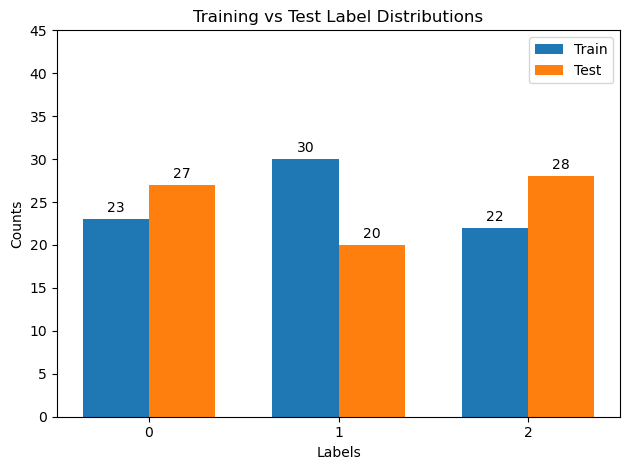

In [5]:
import matplotlib.pyplot as plt

def plot_distributions(y_train, y_test, labels):
    train_counts = [np.sum(y_train == label) for label in labels]
    test_counts = [np.sum(y_test == label) for label in labels]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, train_counts, width, label='Train')
    rects2 = ax.bar(x + width/2, test_counts, width, label='Test')

    ax.set_xlabel('Labels')
    ax.set_ylabel('Counts')
    ax.set_title('Training vs Test Label Distributions')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)
    
    # Adjust y-axis limits to add space at the top
    ax.set_ylim(0, max(train_counts + test_counts) * 1.5)  # Increase 1.5 for more space

    fig.tight_layout()
    return fig

labels = [0, 1, 2]
fig = plot_distributions(y_train, y_test, labels)

#plt.savefig('train_test_distr_1.pdf')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=123, stratify=y)

In [8]:
import numpy as np

print("Training labels", np.bincount(y_train))
print("Test labels", np.bincount(y_test))

Training labels [25 25 25]
Test labels [25 25 25]


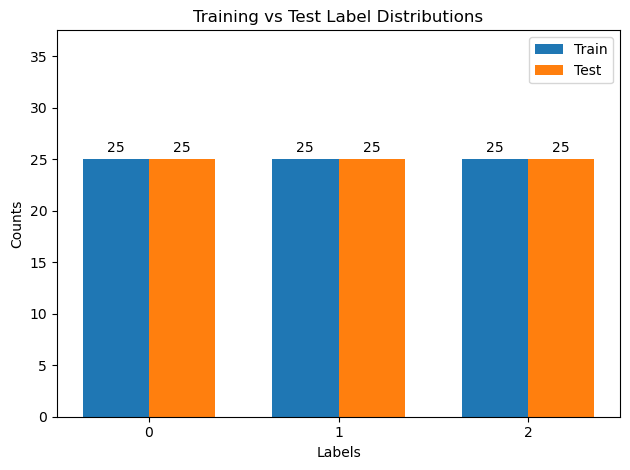

In [9]:
labels = [0, 1, 2]
fig = plot_distributions(y_train, y_test, labels)

#plt.savefig('train_test_distr_2.pdf')
plt.show()

## Normalization: Z-score standardization

In [10]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=123, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(
    X, y, test_size=0.7, random_state=123, stratify=y)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)

## Categorical data

### Ordinal data

In [12]:
import pandas as pd

df = pd.read_csv("data/categoricaldata.csv")
df.head()

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XXL,15.3,class1


In [13]:
mapping = {
    "S":   1,
    "M":   2,
    "L":   3,
    "XL":  4,
    "XXL": 5
}

df["size"] = df["size"].map(mapping)
df

,color,size,price,classlabel
0,green,2,10.1,class1
1,red,3,13.5,class2
2,blue,5,15.3,class1


### Nominal label data

In [14]:
from sklearn.preprocessing import LabelEncoder


lenc = LabelEncoder()

lenc.fit(df["classlabel"]);

In [15]:
df["classlabel"] = lenc.transform(df["classlabel"])
df

,color,size,price,classlabel
0,green,2,10.1,0
1,red,3,13.5,1
2,blue,5,15.3,0


### Nominal features

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
ohe = OneHotEncoder(drop="first")
ohe.fit(df[["color"]]);

In [18]:
ohe.transform(df[["color"]]).toarray()

array([[1., 0.],
       [0., 1.],
       [0., 0.]])

In [19]:
encoded_data = ohe.transform(df[["color"]]).toarray()

In [20]:
# The new features
encoded_df = pd.DataFrame(
    encoded_data, columns=ohe.get_feature_names_out(["color"]))

# Concatenate the DataFrames along axis 1
df = pd.concat([df, encoded_df], axis=1)

# Drop the original column, if desired
df = df.drop(columns="color")

df

,size,price,classlabel,color_green,color_red
0,2,10.1,0,1.0,0.0
1,3,13.5,1,0.0,1.0
2,5,15.3,0,0.0,0.0


## Missing data

In [22]:
import pandas as pd

df = pd.read_csv("data/missingdata.csv")
df.head()

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [23]:
# drop rows with missing values:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [24]:
# drop columns with missing values:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0
